In [1]:
import os
_, current_dir = os.path.split(os.getcwd())
if current_dir == 'notebooks':
    os.chdir('..')
os.getcwd()

'/Users/cumeo/Projects/spinoza/ulm-4/EvEn'

In [2]:
%matplotlib inline

In [3]:
training_path = 'data/conll-2012-flat/train'
test_path = 'data/conll-2012-flat/test-key'
dev_path = 'data/conll-2012-flat/dev'

In [4]:
from tqdm import tqdm

In [5]:
from manipulations import iterate_corpora
from itertools import islice
import seaborn as sns
from collections import Counter
from diskcache import FanoutCache

cache = FanoutCache('output/cache')

def iterate_mentions(dir_):
    num_files = sum(1 for fname in os.listdir(dir_)
                     if fname.endswith('_gold_conll'))
    corpora = iterate_corpora(dir_, '_gold_conll', verbose=False)
    corpora = tqdm(corpora, total=num_files, unit="files")
    for path, corpus in corpora:
        for doc in corpus:
            for mention in doc.system_mentions:
                yield mention

@cache.memoize(tag='names')
def count_names(dir_):
    names = Counter()
    for mention in iterate_mentions(dir_):
        consecutive_nnps = []
        for token, pos in zip(mention.attributes['tokens'], mention.attributes['pos']):
            if pos in ['NNP', 'NNPS']:
                consecutive_nnps.append(token)
            else:
                if consecutive_nnps:
                    name = ' '.join(consecutive_nnps)
                    names[name] += 1
                consecutive_nnps = []
        if consecutive_nnps:
            name = ' '.join(consecutive_nnps)
            names[name] += 1
    return names

In [6]:
names_train = count_names(training_path)

 21%|██        | 405/1940 [03:17<12:29,  2.05files/s]Aborted due to error.
Traceback (most recent call last):
  File "/Users/cumeo/Projects/spinoza/ulm-4/EvEn/manipulations.py", line 55, in iterate_corpora
    corpus = read_corpus(path, verbose)
  File "/Users/cumeo/Projects/spinoza/ulm-4/EvEn/manipulations.py", line 31, in read_corpus
    corpus = Corpus.from_file("reference", f)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cort-0.2.4.5-py3.6.egg/cort/core/corpora.py", line 79, in from_file
    document_as_strings]))
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cort-0.2.4.5-py3.6.egg/cort/core/corpora.py", line 78, in <listcomp>
    return Corpus(description, sorted([from_string(doc) for doc in
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cort-0.2.4.5-py3.6.egg/cort/core/corpora.py", line 14, in 

In [7]:
names_test = count_names(test_path)

100%|██████████| 222/222 [02:06<00:00,  1.76files/s]


In [8]:
len(names_train)

10651

In [9]:
from collections import OrderedDict
most_common_in_train = OrderedDict(names_train.most_common(1000))
most_common_in_train

OrderedDict([('God', 2828),
             ('Jesus', 1603),
             ('China', 1269),
             ('Taiwan', 945),
             ('Lord', 497),
             ('Christ', 457),
             ('Japan', 428),
             ('U.S.', 388),
             ('Iraq', 383),
             ('US', 382),
             ('Israel', 324),
             ('Paul', 309),
             ('President', 272),
             ('New York', 257),
             ('Father', 248),
             ('Hong Kong', 240),
             ('Bush', 228),
             ('United States', 223),
             ('Jerusalem', 217),
             ('Son', 207),
             ('Russia', 205),
             ('John', 201),
             ('Peter', 195),
             ('Macau', 190),
             ('Washington', 187),
             ('Spirit', 184),
             ('Jews', 168),
             ('UN', 165),
             ('Shanghai', 162),
             ('Congress', 152),
             ('America', 146),
             ('Taipei', 144),
             ('al', 142),
             ('he

In [30]:
popular_names = [
    'Abraham',
     'Al',
     'Barak',
     'Bush',
     'Mr. Bush',
     'Christ',
     'David',
     'Gore',
#     'Jesus',
#     'Jesus Christ',
     'John',
     'Milosevic',
     'Paul',
     'Peter',
     'Saddam Hussein',
     'Wang',
     'al',
     'Chen', 
    'Saddam', 
    'Putin', 
    'Prime Minister Ehud Barak', 
    'Rumsfeld', 
    'Drexel', 
    'Mr. Clinton', 
    'Hsia', 
    'Soong', 
    'Herod',
    'Abather', 
    'Mary', 
    'Joseph', 
    'Lloyd', 
    'Mart', 
    'Simon', 
    'Lee', 
    'Galilee', 
    'John Bolton', 
    'Pilate', 
    'Slobodan Milosevic', 
    'Peipu',
    'Peres', 
    'Koizumi',
    'Pinglin', 
    'Lord Jesus', 
    'Aden', 
    'Judas',
    'Philip', 
    'Yasser Arafat', 
    'Yeh',
    'Cheng', 
    'Michael', 
    'Reagan', 
    'Chongqing', 
    'Mr. Barak', 
    'Al Gore', 
    'Wu', 
    'Mr. Krenz', 
    'Chien', 
    'Hillary Clinton', 
    'Timothy',
    'Ritek', 
    'Vojislav Kostunica', 
    'Pudong', 
    'Gao', 
    'James',
    'Peng Li', 
    'Antioch', 
    'Sharon',
    'Qingqing', 
    'chien',
    'Chen Shui',
    'George Bush', 
    'James Soong', 
    'Judea', 
    'Zheng Bing', 
    'Saatchi',
    'Saul', 
    'Mr. Honecker', 
    'Nazareth',
    'George W. Bush', 
    'Mr. Pilson', 
    'Chang', 
    'Imette', 
    'Wolf',
    'Lien Chan', 
    'Mr. Roman',
    'President Putin', 
    'Larry', 
    'Delmed', 
    'Fujian', 
    'Jacob', 
    'Ariel Sharon',
    'Mr. Putin', 
    'Stephen', 
    'Han', 
    'Yasukuni Shrine', 
    'Tim', 
    'Elijah', 
    'Mike', 
    'Lien', 
    'Legislative Yuan',
    'Wu Chien', 
    'D.T.', 
    'Chris',
    'Olivetti', 
    'Ogilvy', 
    'Merrill Lynch', 
    'Mao Zedong', 
    'Simon Peter', 
    'Lin', 
    'Andrew', 
    'Lockerbie', 
    'Lincoln', 
    'Ramallah',
    'Mrs. Thatcher', 
    'yang', 
    'Martha Stewart', 
    'Mr. Kostunica', 
    'Osama Bin Laden',
    'Lee Teng', 
    'Premier Peng Li', 
    'Nixon', 
    'Mr. Ortega', 
    'Adam', 
    'Mr. Kasparov',
    'Hsia Yang', 
    'Liaoning', 
    'Prime Minister Barak', 
    'President Vojislav Kostunica', 
    'Hillary', 
    'Ko Ching', 
    'hua', 
    'Mr. Lawson', 
    'Jim', 
    'Amman', 
    'Karl Rove', 
    'Dr. Blumenfeld', 
    'Grinch', 
    'Teng Hsiang', 
    'McCain', 
    'tai', 
    'Jim Miklaszewski', 
    'Tom', 
    'Ehud Barak', 
    'Ami', 
    'Ms. Volokh', 
    'Elizabeth', 
    'Jackson', 
    'Melchizedek', 
    'Pharisee', 
    'President Chen', 
    'Mr. Laff', 
    'Mr. Gorbachev', 
    'Mr. Greenspan',
    'Dan', 
    'Anderson', 
    'Ronald Reagan', 
    'Joe Lieberman', 
    'De Beers', 
    'Mr. Arafat', 
    'Cheney', 
    'Nader', 
    'Bill Clinton', 
    'Banco Exterior', 
    'Caesarea', 
    'Qichen Qian', 
    'Director Ba', 
    'Nanchang', 
    'Roth', 
    'Mr. McDonough', 
    'Kennedy', 
    'wei', 
    'Bob', 
    'Bill', 
    'Breck Ardery', 
    'Yang', 
    'Zebedee', 
    'Isaiah', 
    'Robert', 
    'Linda', 
    'Meredith', 
    'Mr. Boren', 
    'Liu', 
    'Ida', 
    'Zhou Enlai', 
    'Mrs. Robinson', 
    'Madonna', 
    'Jiujiang', 
    'Gorky', 
    'Rick', 
    'Georgia', 
    'Young', 
    'Barabbas', 
    'Mr. Milosevic', 
    'Palmeiro', 
    'Jiangsu', 
    'Andrea', 
    'Kuomintang', 
    'Mr. Nixon', 
    'President Vladimir Putin', 
    'Fidel Castro', 
    'Castro', 
    'Searle', 
    'Cheng Yung', 
    'Mr. Peterson', 
    'Sammy Sosa', 
    'King Agrippa', 
    'Wu Tsung', 
    'Mr. Andersson', 
    'Xiang Wang', 
    'Laci Peterson', 
    'Mr. Hoffman', 
    'Sotheby', 
    'Mir', 
    'Jack', 
    'Senator Kyl', 
    'Noah', 
    'Powell', 
    'Pusan', 
    'Tamim', 
    'Mr. Courter', 
    'Hsu', 
    'Maliki', 
    'Hitachi', 
    'Matsu', 
    'Wang Peirong', 
    'Krasnoyarsk', 
    'St. Louis', 
    'Tyre', 
    'Beebes', 
    'Yeh Chin', 
    'Prince Al', 
    'Lizzy', 
    'Kramers', 
    'Mr. McDuffie', 
    'Guangxi', 
    'Dalian', 
    'Barney', 
    'Ms. Bogart', 
    'Weihai', 
    'Hsueh', 
    'Houston', 
    'Isaac', 
    'Lu', 
    'Mr. Sharon', 
    'Luneng', 
    'US President Bush', 
    'Allah', 
    'Mr. Florio', 
    'Tsai', 
    'Mrs. Clinton', 
    'Zemin Jiang', 
    'Judah', 
    'Wenzhou', 
    'Governor Bush', 
    'Mr. Lorin', 
    'Mr. Jackson', 
    'Stewart', 
    'Beihai', 
    'Thao', 
    'Zhuhai', 
    'Senator Schumer', 
    'Moody', 
    'Mr. Mahfouz', 
    'Mr. Gelbart', 
    'Mr. Wall', 
    'Huang', 
    'Mancuso', 
    'Laurie Cassman', 
    'Ed Rogers', 
    'John McCain', 
    'Henan',
    'Mr. Phillips', 
    'Bin Laden', 
    'Soong Chen', 
    'yuan', 
    'Caiaphas',
    'Samaria', 
    'Saab',
    'President Akayev',
    'Chavez', 
    'Shu', 
    'William', 
    'Dick Cheney', 
    'Webster', 
    'Chongming', 
    'Ovidie', 
    'Tang', 
    'Zhang Sheng', 
    'ching', 
    'Mr. Brawer', 
    'Ariz', 
    'Xuzhou', 
    'Felix', 
    'Harthi', 
    'Procter', 
    'Hulun Buir League',
    'Berkeley', 
    'Joe', 
    'Jeddah',
    'Urumchi', 
    'Guy Ritchie', 
    'Seita', 
    'Marina',
    'Kailuan Mine Bureau', 
    'Vice President Gore', 
    'Mayaw', 
    'Imette St. Guillen', 
    'Joel',
    'Dr. Baltimore',
    'Shuang', 
    'tzu', 
    'Viacom',
    'Anbo',
    'Mark',
    'President Fidel Castro', 
    'Mr. Sorrell', 
    'Shaanxi', 
    'UN Secretary General Kofi Annan', 
    'Kaine', 
    'Ephesus', 
    'N.J.', 
    'hyun', 
    'Rafida', 
    'Gramm', 
    'Rudman', 
    'Fatah',
    'Melanie', 
    'Andy', 
    'Pons', 
    'Dingxiang', 
    'Barclay', 
    'Laodicea', 
    'Omaha', 
    'Kinmen', 
    'Jonah',
    'Doha Debates', 
    'Ananias',
    'chi', 
    'lan',
    'Lu Yo Ching', 
    'Hugo',
    'Qin',
    'Taichung',
    'Taihsi',
    'Tsung',
    'Ariz.', 
    'Liz',
    'Jinchuan',
    'Executive Yuan',
    'VIA', 
    'Teddy Z',
    'Kemper', 
    'Dow Jones', 
    'Marreiros', 
    'Atayal',
    'Senator McConnell', 
    'Rove', 
    'Richard Nixon',
    'Jemma', 
    'Eli Lilly', 
    'Un Chien Andalou',
    'JFK', 
    'Chang Ming',
    'sui',
    'Ethan', 
    'John King',
    'Paul Hackett', 
    'Erica',
    'Terri', 
    'hsiung', 
    'Chao', 
    'Bethany', 
    'Aquila',
    'Priscilla',
    'Barry', 
    'President Saddam Hussein',
    'Corinth', 
    'Likud'
]
len(popular_names)

376

In [31]:
sum(names_train[n] for n in popular_names)

8917

In [32]:
len(set(popular_names).intersection(names_test))

118

In [33]:
sum(names_test[n] for n in popular_names)

773

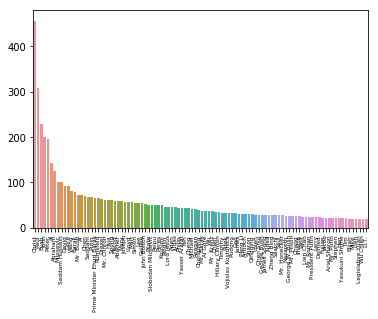

In [37]:
names_to_plot = sorted(popular_names[:100], key=lambda n: -names_train[n])
counts = [names_train[n] for n in names_to_plot]
%matplotlib inline
import seaborn as sns
ax = sns.barplot(names_to_plot, counts)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size='xx-small')